In [1]:
from lab2 import init
pathfinder = init()

In [2]:
import math
import numpy as np

def preprocess_image(image, target_size=(200, 200)):
    # Convertir en nuances de gris
    image_gray = image.convert("L")

    # Caclul des différences de taille entre l'image et la taille cible
    width, height = image_gray.size
    width_delta = (width - target_size[0])
    height_delta = (height - target_size[1])

    # L'image est centrée dans sa longueur, on calcule le crop à appliquer (floor et ceil pour corriger les erreurs d'arrondi)
    left = math.floor(width_delta / 2)
    right = math.ceil(width - width_delta / 2)
    top = height_delta
    bottom = height

    # Calcul du crop final et applique l'offset si besoin
    crop = (left, top, right, bottom)
    return np.expand_dims(np.array(image_gray.crop(crop)), axis=0)

In [3]:
from PIL import Image

images = []
for i in range(1, 26):
    img = Image.open(f"scotch/img{i}.png")
    images.append(preprocess_image(img))

In [4]:
images[0].shape

(1, 200, 200)

In [5]:
points = [pathfinder.detect_line(image) for image in images]

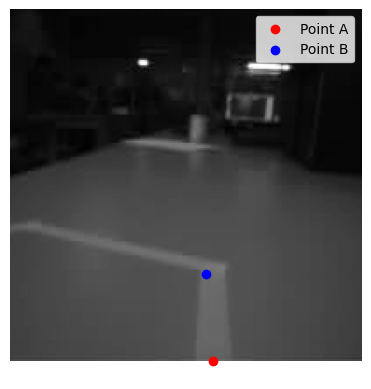

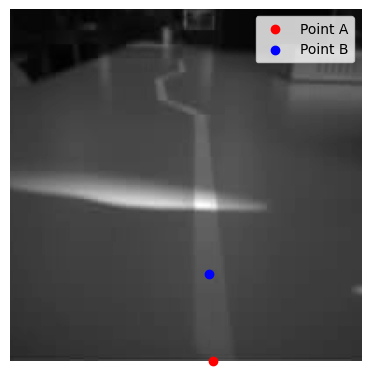

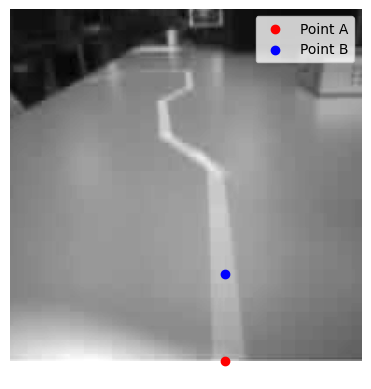

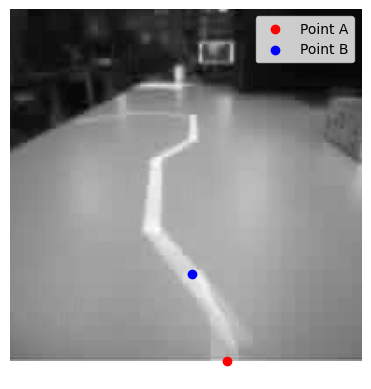

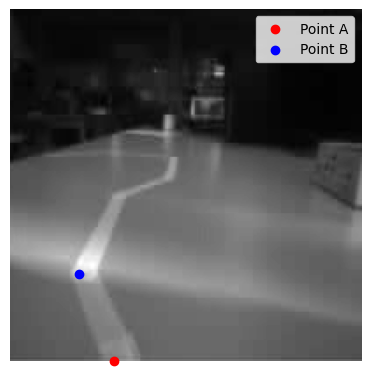

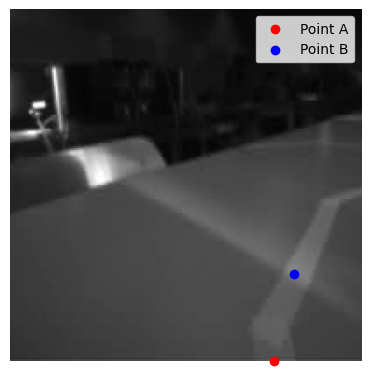

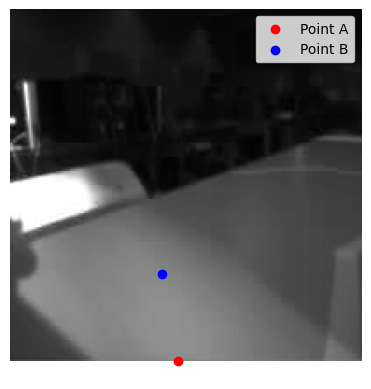

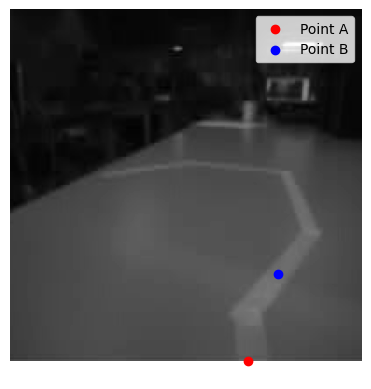

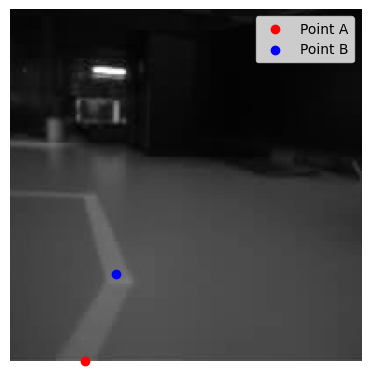

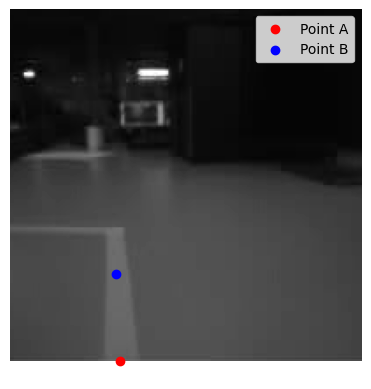

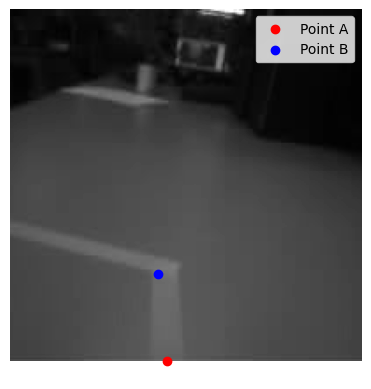

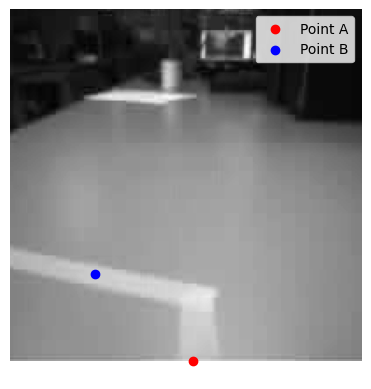

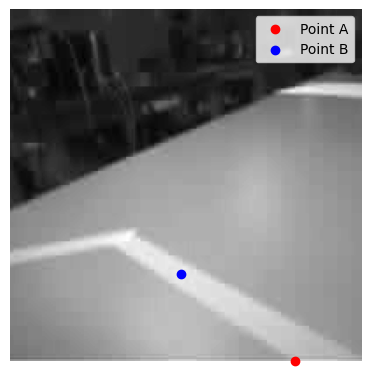

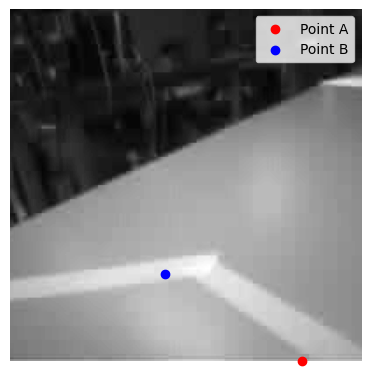

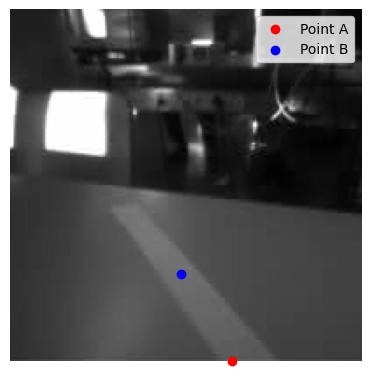

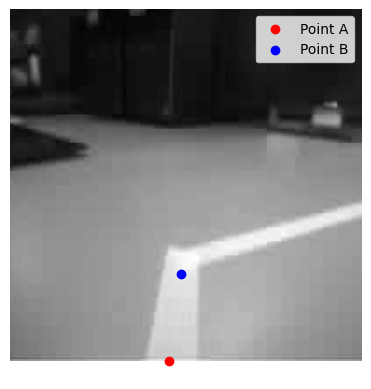

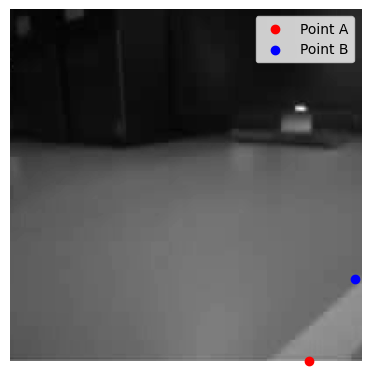

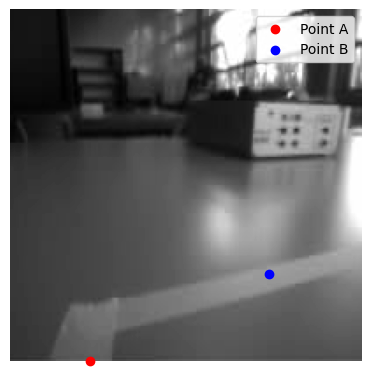

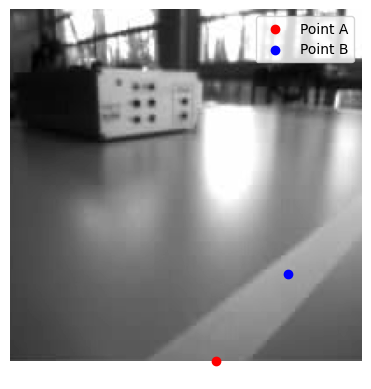

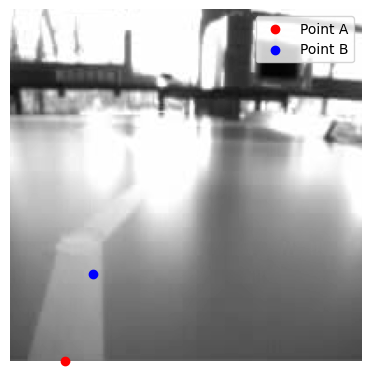

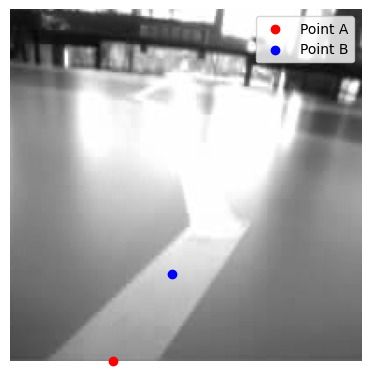

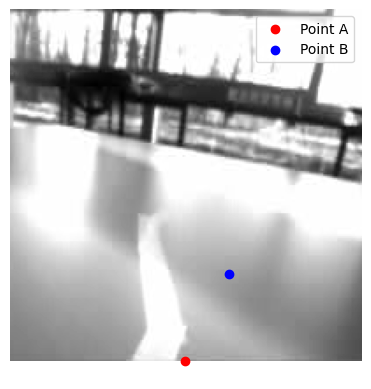

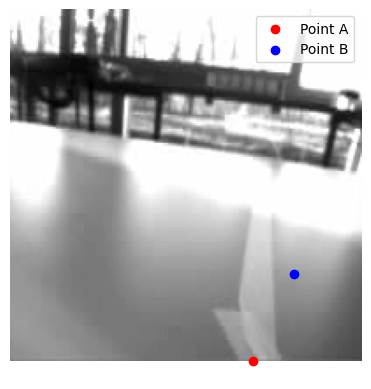

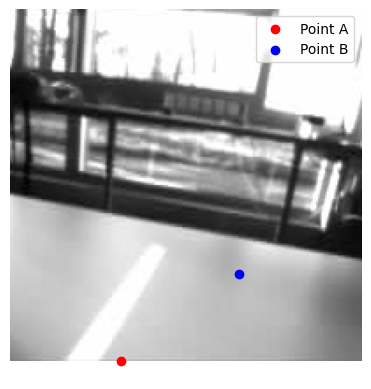

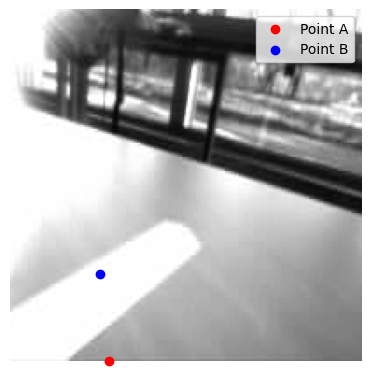

In [6]:
import matplotlib.pyplot as plt

for i, img in enumerate(images):
    point_A = points[i][:2]
    point_B = points[i][2:]

    plt.imshow(img[0], cmap="gray")
    plt.scatter(point_A[0], point_A[1], c="red", label="Point A")
    plt.scatter(point_B[0], point_B[1], c="blue", label="Point B")
    plt.legend()
    plt.axis("off")
    plt.show()